In [1]:
import numpy as np
import pandas as pd

In [2]:
def load_and_clean_excel(file_path):
    df = pd.read_excel(file_path)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df

In [8]:
khan = load_and_clean_excel("경향_크롤링.xlsx")
hani = load_and_clean_excel("한겨레_크롤링.xlsx")
chosun = load_and_clean_excel("조선일보_크롤링.xlsx")
hankook = load_and_clean_excel("한국일보_크롤링.xlsx")

In [43]:
article = pd.concat([hankook, chosun, khan, hani], axis=0, ignore_index=True)

In [44]:
article

,일자,언론사,제목,URL,기사내용
0,20240513,한국일보,"조국 독도행에 일본 ""극히 유감 영토 수호 결의로 대응""",https://www.hankookilbo.com/News/Read/A2024051...,"조국 조국혁신당 대표가 13일 독도를 방문한 것을 두고 일본 정부가 ""극히 유감스럽..."
1,20240513,한국일보,"""기시다 후미오, 한일 셔틀외교 통해 경제협력 지속""",https://www.hankookilbo.com/News/Read/A2024051...,기시다 후미오 일본 총리가 한일경제인회의 참석차 방일한 한국 재계 인사들을 만나 한...
2,20240513,한국일보,"尹, 與 지도부 만찬...""총선 민심, 국정 적극 반영할 것""",https://www.hankookilbo.com/News/Read/A2024051...,"윤석열 대통령이 13일 황우여 국민의힘 비상대책위원장 등 신임 지도부와 만나 ""총선..."
3,20240513,한국일보,"대통령실 ""日 부당한 조치에 강력 대응""...반일 프레임엔 ""국익 훼손""",https://www.hankookilbo.com/News/Read/A2024051...,"대통령실이 13일 일본 정부의 라인야후 네이버 지분 매각 압박에 대해 ""우리 기업의..."
4,20240513,한국일보,"황우여 비대위 첫 회의서 '전대 룰'에 말 아낀 친윤계, 속내는",https://www.hankookilbo.com/News/Read/A2024051...,국민의힘의 13일 '황우여 비상대책위원회' 첫 회의에서 전당대회 룰 변경 여부를 두...
...,...,...,...,...,...
50514,20230514,한겨레,세수결손 벌써 30조 지출 확대해 돌파구 찾아야,http://www.hani.co.kr/arti/economy/economy_gen...,☞한겨레S 뉴스레터를 구독해주세요. 검색창에 ‘에스레터’를 쳐보세요. 세금이 안 ...
50515,20230513,한겨레,숙의토론 뒤 확 바뀐 선거제 개편 여론 ‘비례대표 확대’ 27%→70%,http://www.hani.co.kr/arti/politics/assembly/1...,"내년 총선에 적용할 선거제 개편에 대한 시민참여단 공론화 회의 최종 결과, 국민 1..."
50516,20230513,한겨레,"김남국, 코인 로비 의혹에 “강력대응” ‘회의 중 거래’엔 입 닫아",http://www.hani.co.kr/arti/politics/assembly/1...,거액의 가상자산(암호화폐) 보유 의혹이 제기된 김남국 더불어민주당 의원이 가상자산 ...
50517,20230513,한겨레,한국 시찰단 ‘나흘’ 일본 방문 12시간 협의에도 구체적 일정 합의 못해,http://www.hani.co.kr/arti/international/japan...,한-일 정부가 후쿠시마 제1원전 오염수 현장에 대한 한국 시찰단의 일본 방문을 나흘...


In [45]:
article = article[~((article['기사내용'] == '크롤링 실패') | (article['기사내용'].isnull()))]

In [46]:
len(article)

50071

In [47]:
# 인사동정, 기업공시 기사 등 제거
article = article[
        ~article.제목.str.contains('오늘의 인사') 
        & ~article.제목.str.contains('\[인사\]')
        & ~article.제목.str.contains('일 인사')
        & ~article.제목.str.contains('오늘의 국감')
        & ~article.제목.str.contains('\[부고\]')
        & ~article.제목.str.contains('기업공시')
        ]

In [48]:
len(article)

49741

In [49]:
article['일자'] = pd.to_datetime(article['일자'], format='%Y%m%d')

In [50]:
article = article[
        ~article.URL.str.contains('opinion') 
        & ~article.제목.str.contains('사설|칼럼|메아리|지평성|36.5|기고')
        ]

In [51]:
len(article)

45247

In [52]:
# 사용자 정의 전처리 함수

def preprocess_text(text):
    text = text.replace('윤 대통령', '대통령')
    text = text.replace('김 여사', '김건희')
    text = text.replace('더불어 민주당', '더불어민주당')
    text = text.replace('국민의 힘', '국민의힘')
    text = text.replace('국힘', '국민의힘')
    text = text.replace('더민주', '더불어민주당')
    text = text.replace('조국 혁신당', '조국혁신당')
    text = text.replace('개혁 신당', '개혁신당')
    text = text.replace('이 대표', '이재명')
    text = text.replace('R&D', '연구개발')
    text = text.replace("정권심판론", "심판론")
    text = text.replace("정권안정론", "안정론")
    text = text.replace("정권 심판론", "심판론")
    text = text.replace("정권 안정론", "안정론")
    return text

In [53]:
# 전처리 함수 적용
article['기사내용_clean'] = article['기사내용'].apply(preprocess_text)

In [54]:
import re, unicodedata

def clean_byline(text):
    # byline
    pattern_email = re.compile(r'[-_0-9a-z]+@[-_0-9a-z]+(?:\.[0-9a-z]+)+', flags=re.IGNORECASE)
    pattern_url = re.compile(r'(?:https?:\/\/)?[-_0-9a-z]+(?:\.[-_0-9a-z]+)+', flags=re.IGNORECASE)
    pattern_others = re.compile(r'\.([^\.]*(?:기자|특파원|교수|작가|대표|논설|고문|주필|부문장|팀장|장관|원장|연구원|이사장|위원|실장|차장|부장|에세이|화백|사설|소장|단장|과장|기획자|큐레이터|저작권|평론가|©|©|ⓒ|\@|\/|=|▶|무단|전재|재배포|금지|\[|\]|\(\))[^\.]*)$')
    result = pattern_email.sub('', text)
    result = pattern_url.sub('', result)
    result = pattern_others.sub('.', result)

    # 본문 시작 전 꺽쇠로 쌓인 바이라인 제거
    pattern_bracket = re.compile(r'^((?:\[.+\])|(?:【.+】)|(?:<.+>)|(?:◆.+◆)\s)')
    result = pattern_bracket.sub('', result).strip()

    return result

article['기사내용_clean'] = article.기사내용_clean.map(clean_byline)

In [55]:
def text_filter(text):
    import re
    from string import whitespace, punctuation
    punct_except_percent = ''.join([chr for chr in punctuation if chr != '%'])
    whitespace_convert_pattern = re.compile(f'[{whitespace}{punct_except_percent}]+')
    exclude_pattern = re.compile(r'[^\% 0-9a-zA-Zㄱ-ㅣ가-힣]+')

    result = whitespace_convert_pattern.sub(' ', text)
    result = exclude_pattern.sub(' ', result).strip()
    result = whitespace_convert_pattern.sub(' ', result)
    return result

article['기사내용_clean'] = article.기사내용_clean.map(text_filter)

In [56]:
article

,일자,언론사,제목,URL,기사내용,기사내용_clean
0,2024-05-13,한국일보,"조국 독도행에 일본 ""극히 유감 영토 수호 결의로 대응""",https://www.hankookilbo.com/News/Read/A2024051...,"조국 조국혁신당 대표가 13일 독도를 방문한 것을 두고 일본 정부가 ""극히 유감스럽...",조국 조국혁신당 대표가 13일 독도를 방문한 것을 두고 일본 정부가 극히 유감스럽다...
1,2024-05-13,한국일보,"""기시다 후미오, 한일 셔틀외교 통해 경제협력 지속""",https://www.hankookilbo.com/News/Read/A2024051...,기시다 후미오 일본 총리가 한일경제인회의 참석차 방일한 한국 재계 인사들을 만나 한...,기시다 후미오 일본 총리가 한일경제인회의 참석차 방일한 한국 재계 인사들을 만나 한...
2,2024-05-13,한국일보,"尹, 與 지도부 만찬...""총선 민심, 국정 적극 반영할 것""",https://www.hankookilbo.com/News/Read/A2024051...,"윤석열 대통령이 13일 황우여 국민의힘 비상대책위원장 등 신임 지도부와 만나 ""총선...",윤석열 대통령이 13일 황우여 국민의힘 비상대책위원장 등 신임 지도부와 만나 총선에...
3,2024-05-13,한국일보,"대통령실 ""日 부당한 조치에 강력 대응""...반일 프레임엔 ""국익 훼손""",https://www.hankookilbo.com/News/Read/A2024051...,"대통령실이 13일 일본 정부의 라인야후 네이버 지분 매각 압박에 대해 ""우리 기업의...",대통령실이 13일 일본 정부의 라인야후 네이버 지분 매각 압박에 대해 우리 기업의 ...
4,2024-05-13,한국일보,"황우여 비대위 첫 회의서 '전대 룰'에 말 아낀 친윤계, 속내는",https://www.hankookilbo.com/News/Read/A2024051...,국민의힘의 13일 '황우여 비상대책위원회' 첫 회의에서 전당대회 룰 변경 여부를 두...,국민의힘의 13일 황우여 비상대책위원회 첫 회의에서 전당대회 룰 변경 여부를 두고 ...
...,...,...,...,...,...,...
50514,2023-05-14,한겨레,세수결손 벌써 30조 지출 확대해 돌파구 찾아야,http://www.hani.co.kr/arti/economy/economy_gen...,☞한겨레S 뉴스레터를 구독해주세요. 검색창에 ‘에스레터’를 쳐보세요. 세금이 안 ...,한겨레S 뉴스레터를 구독해주세요 검색창에 에스레터 를 쳐보세요 세금이 안 걷힌다 지...
50515,2023-05-13,한겨레,숙의토론 뒤 확 바뀐 선거제 개편 여론 ‘비례대표 확대’ 27%→70%,http://www.hani.co.kr/arti/politics/assembly/1...,"내년 총선에 적용할 선거제 개편에 대한 시민참여단 공론화 회의 최종 결과, 국민 1...",내년 총선에 적용할 선거제 개편에 대한 시민참여단 공론화 회의 최종 결과 국민 10...
50516,2023-05-13,한겨레,"김남국, 코인 로비 의혹에 “강력대응” ‘회의 중 거래’엔 입 닫아",http://www.hani.co.kr/arti/politics/assembly/1...,거액의 가상자산(암호화폐) 보유 의혹이 제기된 김남국 더불어민주당 의원이 가상자산 ...,거액의 가상자산 암호화폐 보유 의혹이 제기된 김남국 더불어민주당 의원이 가상자산 발...
50517,2023-05-13,한겨레,한국 시찰단 ‘나흘’ 일본 방문 12시간 협의에도 구체적 일정 합의 못해,http://www.hani.co.kr/arti/international/japan...,한-일 정부가 후쿠시마 제1원전 오염수 현장에 대한 한국 시찰단의 일본 방문을 나흘...,한 일 정부가 후쿠시마 제1원전 오염수 현장에 대한 한국 시찰단의 일본 방문을 나흘...


> # 2차 품사 태깅 및 불용어 제거

In [63]:
file_path = '/Users/ijiseon/Desktop/ESAA-OB/신문_프로젝트/stopword.txt'

# 파일이 존재하는지 확인
import os
print(os.path.exists(file_path))  # 파일이 존재하면 True, 그렇지 않으면 False

# 파일 읽기
with open(file_path, 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
stop_words = [word.strip() for word in stop_words]
stop_words = stop_words + ['수', '말', '전']

print(stop_words)


True
['않다', '되어다', '되다', '하다', '어떻다', '이렇다', '이다', '어제', '매일', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만',

In [64]:
from konlpy.tag import Okt
okt = Okt()

In [32]:
import konlpy
import os

# konlpy 패키지가 설치된 경로 확인
konlpy_path = os.path.dirname(konlpy.__file__)
print("Konlpy 경로:", konlpy_path)

Konlpy 경로: /Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy


In [33]:
!jar xvf open-korean-text-2.1.0.jar

java.io.FileNotFoundException: open-korean-text-2.1.0.jar (No such file or directory)
	at java.base/java.io.FileInputStream.open0(Native Method)
	at java.base/java.io.FileInputStream.open(FileInputStream.java:213)
	at java.base/java.io.FileInputStream.<init>(FileInputStream.java:152)
	at java.base/java.io.FileInputStream.<init>(FileInputStream.java:106)
	at jdk.jartool/sun.tools.jar.Main.run(Main.java:394)
	at jdk.jartool/sun.tools.jar.Main.main(Main.java:1708)


In [34]:
import os
import urllib.request

# Konlpy 패키지가 설치된 경로
konlpy_path = '/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java'
print("Konlpy 경로:", konlpy_path)

# 변경할 경로
if os.path.exists(konlpy_path):
    os.chdir(konlpy_path)
    print("경로 변경 성공:", os.getcwd())
    
    # JAR 파일 다운로드
    jar_url = "https://github.com/open-korean-text/open-korean-text/releases/download/2.1.0/open-korean-text-2.1.0.jar"
    jar_file = "open-korean-text-2.1.0.jar"
    
    # 파일이 이미 존재하지 않는 경우 다운로드
    if not os.path.exists(jar_file):
        print(f"{jar_file} 다운로드 중...")
        urllib.request.urlretrieve(jar_url, jar_file)
        print(f"{jar_file} 다운로드 완료.")
    else:
        print(f"{jar_file} 파일이 이미 존재합니다.")
else:
    print("경로가 존재하지 않습니다:", konlpy_path)

Konlpy 경로: /Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java
경로 변경 성공: /Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java
open-korean-text-2.1.0.jar 파일이 이미 존재합니다.


In [35]:
import os

# Konlpy 패키지가 설치된 경로
konlpy_path = '/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java'
print("Konlpy 경로:", konlpy_path)

# 변경할 경로
if os.path.exists(konlpy_path):
    os.chdir(konlpy_path)
    print("경로 변경 성공:", os.getcwd())
    
    # 현재 디렉토리의 파일 목록 확인
    files = os.listdir()
    print("현재 디렉토리의 파일 목록:", files)
    
    # Jar 파일 추출
    jar_file = 'open-korean-text-2.1.0.jar'
    if jar_file in files:
        result = os.system(f'jar xvf {jar_file}')
        if result == 0:
            print(f"{jar_file} 파일 추출 성공.")
        else:
            print(f"{jar_file} 파일 추출 실패.")
    else:
        print(f"{jar_file} 파일이 존재하지 않습니다.")
else:
    print("경로가 존재하지 않습니다:", konlpy_path)

Konlpy 경로: /Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java
경로 변경 성공: /Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java
현재 디렉토리의 파일 목록: ['scala-library-2.12.3.jar', 'twitter-text-1.14.7.jar', 'komoran-3.0.jar', 'jhannanum-0.8.4.jar', 'open-korean-text-2.1.0.jar', 'bin', 'aho-corasick.jar', 'org', 'kkma-2.0.jar', 'META-INF', 'shineware-common-1.0.jar', 'snakeyaml-1.12.jar', 'data', 'conf', 'shineware-ds-1.0.jar']
  생성됨: META-INF/
 증가됨: META-INF/MANIFEST.MF
  생성됨: org/
  생성됨: org/openkoreantext/
  생성됨: org/openkoreantext/processor/
 증가됨: org/openkoreantext/processor/KoreanPosJava.class
 증가됨: org/openkoreantext/processor/KoreanTokenJava.class
 증가됨: org/openkoreantext/processor/OpenKoreanTextProcessor$.class
 증가됨: org/openkoreantext/processor/OpenKoreanTextProcessor.class
 증가됨: org/openkoreantext/processor/OpenKoreanTextProcessorJava.class
  생성됨: org/openkoreantext/processor/normalizer/
 증가됨: org/openkoreantext/processor/normalizer/KoreanNormalizer$.c

In [36]:
# names.txt 파일 경로
names_file = 'org/openkoreantext/processor/util/noun/names.txt'
if os.path.exists(names_file):
    with open(names_file, 'r', encoding='utf-8') as f:
        data = f.read()
    print("기존 데이터:\n", data)

기존 데이터:
 가몽
가온
갓세븐
강새이
게임닉가
관우
귀여미
규
김유이
김준면
까까런
노컷
누너예
니노
다마고치
다이무스
대학생
데이브
도요토미
동운
동이
두주니
디시인사이드
디오
라몹
라스
라옵
멍구
메이든
명덕
명량
문민정부
미네
방엘리
병헌
붓다
비정상회담
빼빼로
삼풍
샤인온미
성식
성열
세라문
세라복
세종대왕
손권
손책
쇼미더머니
쇼챔
순규
스라소니
신동아
신쓰패밀리
신아라
아베
안상홍
안홍준
여누
여랑
여포
연합
오꾸닭
요섭
웃찾사
원식
유병언
유비
유이
윤기형
이나단
이명박
이완용
임창용
자괴
자니윤
자대련
자유
재중이
전교조
정윤회
제갈량
조자룡
조조
준면
지오디
지존파
진영오
차작가
차트
창섭
챠트
첸
코르사주
하무열
하용파쿠
혁재
현이
현태
혜미
조국혁신당
개혁신당
국민의힘
심판론
안정론
연구개발
윤정부
더불어민주당



In [37]:
!cd /Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java && jar xvf open-korean-text-2.1.0.jar && jar cvf open-korean-text-2.1.0.jar org

  생성됨: META-INF/
 증가됨: META-INF/MANIFEST.MF
  생성됨: org/
  생성됨: org/openkoreantext/
  생성됨: org/openkoreantext/processor/
 증가됨: org/openkoreantext/processor/KoreanPosJava.class
 증가됨: org/openkoreantext/processor/KoreanTokenJava.class
 증가됨: org/openkoreantext/processor/OpenKoreanTextProcessor$.class
 증가됨: org/openkoreantext/processor/OpenKoreanTextProcessor.class
 증가됨: org/openkoreantext/processor/OpenKoreanTextProcessorJava.class
  생성됨: org/openkoreantext/processor/normalizer/
 증가됨: org/openkoreantext/processor/normalizer/KoreanNormalizer$.class
 증가됨: org/openkoreantext/processor/normalizer/KoreanNormalizer$Segment$.class
 증가됨: org/openkoreantext/processor/normalizer/KoreanNormalizer$Segment.class
 증가됨: org/openkoreantext/processor/normalizer/KoreanNormalizer.class
  생성됨: org/openkoreantext/processor/phrase_extractor/
 증가됨: org/openkoreantext/processor/phrase_extractor/KoreanPhraseExtractor$.class
 증가됨: org/openkoreantext/processor/phrase_extractor/KoreanPhraseExtractor$KoreanPhrase$.cla

 증가됨: org/openkoreantext/processor/util/noun/nouns.txt
 증가됨: org/openkoreantext/processor/util/noun/pokemon.txt
 증가됨: org/openkoreantext/processor/util/noun/profane.txt
 증가됨: org/openkoreantext/processor/util/noun/slangs.txt
 증가됨: org/openkoreantext/processor/util/noun/spam.txt
 증가됨: org/openkoreantext/processor/util/noun/twitter.txt
 증가됨: org/openkoreantext/processor/util/noun/wikipedia_title_nouns.txt
  생성됨: org/openkoreantext/processor/util/substantives/
 증가됨: org/openkoreantext/processor/util/substantives/family_names.txt
 증가됨: org/openkoreantext/processor/util/substantives/given_names.txt
 증가됨: org/openkoreantext/processor/util/substantives/modifier.txt
 증가됨: org/openkoreantext/processor/util/substantives/suffix.txt
  생성됨: org/openkoreantext/processor/util/typos/
 증가됨: org/openkoreantext/processor/util/typos/typos.txt
  생성됨: org/openkoreantext/processor/util/verb/
 증가됨: org/openkoreantext/processor/util/verb/eomi.txt
 증가됨: org/openkoreantext/processor/util/verb/pre_eomi.txt
 증가됨: 

추가하는 중: org/openkoreantext/processor/tools/DeduplicateAndSortDictionaries.class(입력 = 1117) (출력 = 823)(26%를 감소함)
추가하는 중: org/openkoreantext/processor/tools/Runnable.class(입력 = 964) (출력 = 694)(28%를 감소함)
추가하는 중: org/openkoreantext/processor/tools/UpdateAllTheExamples$.class(입력 = 4383) (출력 = 1794)(59%를 감소함)
추가하는 중: org/openkoreantext/processor/tools/UpdateAllTheExamples.class(입력 = 1089) (출력 = 756)(30%를 감소함)
추가하는 중: org/openkoreantext/processor/util/(입력 = 0) (출력 = 0)(0%를 저장함)
추가하는 중: org/openkoreantext/processor/util/CharArrayMap$1.class(입력 = 1531) (출력 = 571)(62%를 감소함)
추가하는 중: org/openkoreantext/processor/util/CharArrayMap$EmptyCharArrayMap.class(입력 = 2053) (출력 = 725)(64%를 감소함)
추가하는 중: org/openkoreantext/processor/util/CharArrayMap$EntryIterator.class(입력 = 3118) (출력 = 1270)(59%를 감소함)
추가하는 중: org/openkoreantext/processor/util/CharArrayMap$EntrySet.class(입력 = 2788) (출력 = 1181)(57%를 감소함)
추가하는 중: org/openkoreantext/processor/util/CharArrayMap$MapEntry.class(입력 = 2433) (출력 = 1078)(55%를 감소함)
추가하는

In [65]:
# test
from konlpy.tag import Okt

okt = Okt()

print(okt.pos("조국혁신당과 개혁신당이 창당."))
print(okt.pos("국민의힘과 더불어민주당이 맞붙었다."))

[('조국혁신당', 'Noun'), ('과', 'Josa'), ('개혁신당', 'Noun'), ('이', 'Josa'), ('창', 'Noun'), ('당', 'Suffix'), ('.', 'Punctuation')]
[('국민의힘', 'Noun'), ('과', 'Josa'), ('더불어민주당', 'Noun'), ('이', 'Josa'), ('맞붙었다', 'Verb'), ('.', 'Punctuation')]


In [79]:
print(okt.pos("대통령 만들라 고 말했다."))

[('대통령', 'Noun'), ('만들라', 'Verb'), ('고', 'Noun'), ('말', 'Noun'), ('했다', 'Verb'), ('.', 'Punctuation')]


> # 시계열 기사 분석

In [199]:
data1 = article[(article['일자'] >= '2024-01-01') &
                           (article['일자'] <= '2024-04-09')]

In [200]:
data2 = article[(article['일자'] < '2024-01-01')]

In [201]:
# 일자 열을 인덱스로 설정
data1.set_index('일자', inplace=True)

# 일자를 기준으로 데이터를 월별로 그룹화하고 보도 빈도를 합산
monthly_data = data1.groupby([pd.Grouper(freq='M'), '언론사']).size().unstack(fill_value=0)

# 결과 확인
print(monthly_data)

언론사         경향신문  조선일보  한겨레  한국일보
일자                               
2024-01-31  1420  1140  449   993
2024-02-29  1169   882  604   834
2024-03-31  1386  1102  837   946
2024-04-30   492   406  333   319


In [202]:
# 일자 열을 인덱스로 설정
data2.set_index('일자', inplace=True)

# 일자를 기준으로 데이터를 월별로 그룹화하고 보도 빈도를 합산
monthly_data = data2.groupby([pd.Grouper(freq='M'), '언론사']).size().unstack(fill_value=0)

# 결과 확인
print(monthly_data)

언론사         경향신문  조선일보  한겨레  한국일보
일자                               
2023-04-30   930     0    0     0
2023-05-31  1375   665  440   474
2023-06-30  1220   921  706   741
2023-07-31  1333   904  679   693
2023-08-31  1197   870  700   736
2023-09-30  1288  1076  736   793
2023-10-31  1256   835  725   736
2023-11-30  1290   944  804   826
2023-12-31  1243   897  693   781


In [203]:
import pandas as pd

data = {
    '일자': [
        '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
        '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
        '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'
    ],
    '경향신문': [1420, 1169, 1386, 492, 1375, 1220, 1333, 1197, 1288, 1256, 1290, 1243],
    '조선일보': [1140, 882, 1102, 406, 665, 921, 904, 870, 1076, 835, 944, 897],
    '한겨레': [449, 604, 837, 333, 440, 706, 679, 700, 736, 725, 804, 693],
    '한국일보': [993, 834, 946, 319, 474, 741, 693, 736, 793, 736, 826, 781]
}

df = pd.DataFrame(data)
df['일자'] = pd.to_datetime(df['일자'])
df.set_index('일자', inplace=True)

print(df)


            경향신문  조선일보  한겨레  한국일보
일자                               
2024-01-31  1420  1140  449   993
2024-02-29  1169   882  604   834
2024-03-31  1386  1102  837   946
2024-04-30   492   406  333   319
2023-05-31  1375   665  440   474
2023-06-30  1220   921  706   741
2023-07-31  1333   904  679   693
2023-08-31  1197   870  700   736
2023-09-30  1288  1076  736   793
2023-10-31  1256   835  725   736
2023-11-30  1290   944  804   826
2023-12-31  1243   897  693   781


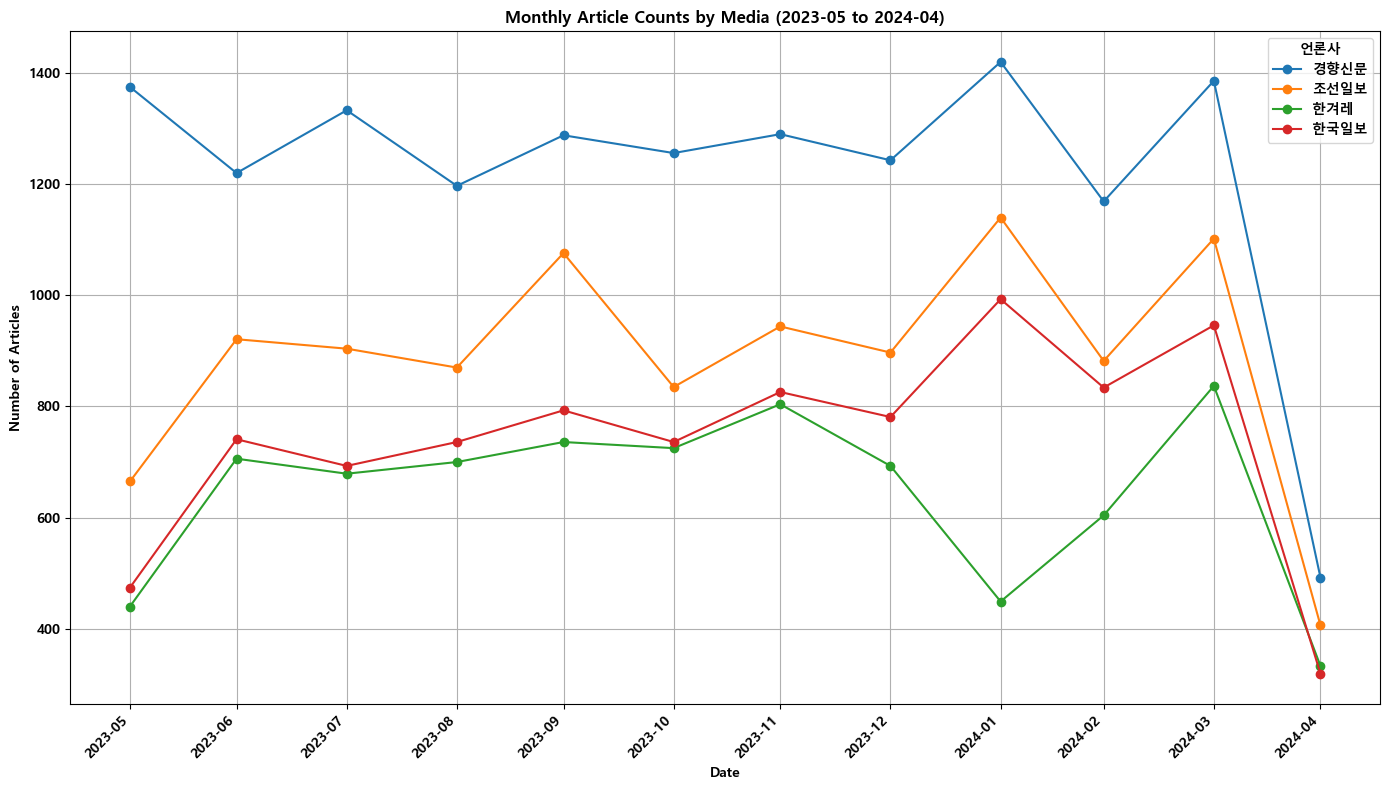

In [207]:
import matplotlib.pyplot as plt

# 시각화
fig, ax = plt.subplots(figsize=(14, 8))

df.plot(kind='line', marker='o', ax=ax)

# x축 눈금을 모든 월로 설정
ax.set_xticks(pd.date_range(start='2023-05-01', end='2024-04-30', freq='M'))
ax.set_xticklabels(pd.date_range(start='2023-05-01', end='2024-04-30', freq='M').strftime('%Y-%m'))

plt.title('Monthly Article Counts by Media (2023-05 to 2024-04)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend(title='언론사')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



> # 총선 100일 전 

In [67]:
article100 = article[(article['일자'] >= '2024-01-01') &
                           (article['일자'] <= '2024-04-09')]

In [69]:
len(article100)

13312

In [185]:
article100.head()

,일자,언론사,제목,URL,기사내용,기사내용_clean,기사내용_tagged,기사내용_noun
1200,2024-04-09,한국일보,"이재명, 정권 심장부 '용산'서 피날레 ""악어의 눈물 속으면 피눈물""",https://www.hankookilbo.com/News/Read/A2024040...,이재명 더불어민주당 상임공동선거대책위원장은 4·10 총선 기간 동안 일관되게 '정권...,이재명 더불어민주당 상임공동선거대책위원장은 4 10 총선 기간 동안 일관되게 정권심...,"[이재명, 더불어민주당, 상임, 선거, 대책, 위원장, 총선, 기간, 일관, 정권,...","[이재명, 더불어민주당, 상임, 선거, 대책, 위원장, 총선, 기간, 일관, 정권,..."
1201,2024-04-09,한국일보,"위기의 개혁신당 마지막 호소 ""소신파 정치인 멸종시키지 말아달라""",https://www.hankookilbo.com/News/Read/A2024040...,개혁신당은 4·10 총선을 하루 앞둔 9일 '소신파 정치인을 지켜달라'고 호소했다....,개혁신당은 4 10 총선을 하루 앞둔 9일 소신파 정치인을 지켜달라 고 호소했다 3...,"[개혁신당, 총선, 하루, 앞두다, 신파, 정치인, 지키다, 달라, 고, 호소, 지...","[개혁신당, 총선, 하루, 신파, 정치인, 달라, 호소, 지대, 선두, 주자, 개혁..."
1202,2024-04-09,한국일보,"광화문광장 선 조국 ""촛불혁명 정신으로 3년은 너무 길다""",https://www.hankookilbo.com/News/Read/A2024040...,조국 조국혁신당 대표가 4·10 총선 공식 선거운동 마지막 날인 9일 첫날과 같이 ...,조국 조국혁신당 대표가 4 10 총선 공식 선거운동 마지막 날인 9일 첫날과 같이 ...,"[조국, 조국혁신당, 대표, 총선, 공식, 선거운동, 마지막, 날인, 첫날, 부산,...","[조국, 조국혁신당, 대표, 총선, 공식, 선거운동, 마지막, 날인, 첫날, 부산,..."
1203,2024-04-09,한국일보,"""12척의 배처럼 12시간에 나라 구해야""...한동훈, '30분마다 한 곳씩' 서울...",https://www.hankookilbo.com/News/Read/A2024040...,국민의힘은 4·10 총선 전날인 9일 수도권 지역에 막판 화력을 쏟아부었다. 현안에...,국민의힘은 4 10 총선 전날인 9일 수도권 지역에 막판 화력을 쏟아부었다 현안에 ...,"[국민의힘, 총선, 전날, 수도권, 지역, 막판, 화, 쏟다, 부다, 현안, 민감하...","[국민의힘, 총선, 전날, 수도권, 지역, 막판, 화, 현안, 반응, 최대, 격전,..."
1204,2024-04-09,한국일보,"'이대생 성상납' 발언에 “친일 부인 못해"" vs ""본질은 여성비하"" 논란",https://www.hankookilbo.com/News/Read/A2024040...,이화여대가 고은광순씨의 ‘이화여대생 미군 성 상납’ 옹호 발언을 두고 “확인되지 않...,이화여대가 고은광순씨의 이화여대생 미군 성 상납 옹호 발언을 두고 확인되지 않은 사...,"[이화여대, 고은광순, 이화, 여대생, 미군, 성, 상납, 옹호, 발언, 두다, 확...","[이화여대, 고은광순, 이화, 여대생, 미군, 성, 상납, 옹호, 발언, 확인, 사..."


In [70]:
from konlpy.tag import Okt

# 형태소 분석기 생성
okt = Okt()

# 형태소 중 포함할 품사 태그를 리스트로 생성합니다.
pos_list = ["Noun", "Verb", "Adjective"]

# 기사내용_clean 열의 각 텍스트에 대해 형태소 태깅 수행
article_list = article100['기사내용_clean']
tagged_articles = []


for arc in article_list:
    tag_sentence = okt.pos(arc, stem=True)
    
    # 형태소 태깅 및 불용어 제거
    filtered_sentence = [word for word, pos in tag_sentence if pos in pos_list and word not in stop_words]
    tagged_articles.append(filtered_sentence)

# 결과를 데이터프레임에 추가
article100['기사내용_tagged'] = tagged_articles

/var/folders/f4/skyf3wfx5570p30yjkrfkxd00000gn/T/ipykernel_53336/2957801119.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article100['기사내용_tagged'] = tagged_articles


In [72]:
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

In [73]:
# 단어 빈도 분석 (명사만 사용)
noun_list = []
for tag_sentence in article100['기사내용_tagged']:
    noun_list.extend([word for word, pos in okt.pos(" ".join(tag_sentence)) if pos == "Noun"])

noun_counts = Counter(noun_list)
print("단어 빈도 상위 10개 (명사만):", noun_counts.most_common(10))


단어 빈도 상위 10개 (명사만): [('고', 41425), ('대통령', 32192), ('의원', 29941), ('후보', 22573), ('며', 20104), ('민주당', 19989), ('위원장', 18004), ('날', 17641), ('대표', 17550), ('국민의힘', 16306)]


In [75]:
print("단어 빈도 상위 10개 (명사만):", noun_counts.most_common(100))

단어 빈도 상위 10개 (명사만): [('고', 41425), ('대통령', 32192), ('의원', 29941), ('후보', 22573), ('며', 20104), ('민주당', 19989), ('위원장', 18004), ('날', 17641), ('대표', 17550), ('국민의힘', 16306), ('총선', 14760), ('정부', 14527), ('선거', 13188), ('공천', 13164), ('대해', 12522), ('국민', 11336), ('대한', 11301), ('이재명', 11221), ('북한', 11154), ('명', 11132), ('정치', 10616), ('라며', 10246), ('지난', 9909), ('위', 9319), ('당', 9206), ('서울', 8984), ('지역', 8984), ('장관', 8963), ('위원', 8766), ('윤석열', 8671), ('문제', 8472), ('중', 8381), ('김', 8331), ('한국', 7901), ('관련', 7873), ('미국', 7815), ('위원회', 7386), ('위해', 7264), ('리다', 7215), ('국회', 7196), ('안', 7109), ('정책', 6750), ('더', 6653), ('더불어민주당', 6372), ('투표', 6365), ('비판', 6335), ('경선', 6233), ('정당', 6193), ('출마', 6067), ('사람', 5966), ('회의', 5923), ('선', 5916), ('주장', 5870), ('지난해', 5838), ('생각', 5828), ('트럼프', 5785), ('때문', 5732), ('지역구', 5645), ('이후', 5635), ('상황', 5602), ('입장', 5574), ('사건', 5569), ('대통령실', 5559), ('사실', 5454), ('보이', 5429), ('결과', 5330), ('당시', 5310), ('발언', 5246),

> # 명사로 연관단어 워드 클라우드

In [91]:
article100

,일자,언론사,제목,URL,기사내용,기사내용_clean,기사내용_tagged
1200,2024-04-09,한국일보,"이재명, 정권 심장부 '용산'서 피날레 ""악어의 눈물 속으면 피눈물""",https://www.hankookilbo.com/News/Read/A2024040...,이재명 더불어민주당 상임공동선거대책위원장은 4·10 총선 기간 동안 일관되게 '정권...,이재명 더불어민주당 상임공동선거대책위원장은 4 10 총선 기간 동안 일관되게 정권심...,"[이재명, 더불어민주당, 상임, 선거, 대책, 위원장, 총선, 기간, 일관, 정권,..."
1201,2024-04-09,한국일보,"위기의 개혁신당 마지막 호소 ""소신파 정치인 멸종시키지 말아달라""",https://www.hankookilbo.com/News/Read/A2024040...,개혁신당은 4·10 총선을 하루 앞둔 9일 '소신파 정치인을 지켜달라'고 호소했다....,개혁신당은 4 10 총선을 하루 앞둔 9일 소신파 정치인을 지켜달라 고 호소했다 3...,"[개혁신당, 총선, 하루, 앞두다, 신파, 정치인, 지키다, 달라, 고, 호소, 지..."
1202,2024-04-09,한국일보,"광화문광장 선 조국 ""촛불혁명 정신으로 3년은 너무 길다""",https://www.hankookilbo.com/News/Read/A2024040...,조국 조국혁신당 대표가 4·10 총선 공식 선거운동 마지막 날인 9일 첫날과 같이 ...,조국 조국혁신당 대표가 4 10 총선 공식 선거운동 마지막 날인 9일 첫날과 같이 ...,"[조국, 조국혁신당, 대표, 총선, 공식, 선거운동, 마지막, 날인, 첫날, 부산,..."
1203,2024-04-09,한국일보,"""12척의 배처럼 12시간에 나라 구해야""...한동훈, '30분마다 한 곳씩' 서울...",https://www.hankookilbo.com/News/Read/A2024040...,국민의힘은 4·10 총선 전날인 9일 수도권 지역에 막판 화력을 쏟아부었다. 현안에...,국민의힘은 4 10 총선 전날인 9일 수도권 지역에 막판 화력을 쏟아부었다 현안에 ...,"[국민의힘, 총선, 전날, 수도권, 지역, 막판, 화, 쏟다, 부다, 현안, 민감하..."
1204,2024-04-09,한국일보,"'이대생 성상납' 발언에 “친일 부인 못해"" vs ""본질은 여성비하"" 논란",https://www.hankookilbo.com/News/Read/A2024040...,이화여대가 고은광순씨의 ‘이화여대생 미군 성 상납’ 옹호 발언을 두고 “확인되지 않...,이화여대가 고은광순씨의 이화여대생 미군 성 상납 옹호 발언을 두고 확인되지 않은 사...,"[이화여대, 고은광순, 이화, 여대생, 미군, 성, 상납, 옹호, 발언, 두다, 확..."
...,...,...,...,...,...,...,...
44200,2024-01-01,한겨레,경향신문 중앙일보 새해 여론조사 ‘거부권 행사 부적절’ 각각 62% 65%,http://www.hani.co.kr/arti/politics/politics_g...,새해 여론조사에서 ‘김건희 여사 특검법’에 대한 윤석열 대통령의 거부권 행사가 부적...,새해 여론조사에서 김건희 여사 특검법 에 대한 윤석열 대통령의 거부권 행사가 부적절...,"[새해, 여론조사, 김건희, 여사, 특검법, 대한, 윤석열, 대통령, 거부권, 행사..."
44202,2024-01-01,한겨레,경향신문 중앙일보 한국일보 총선 여론조사,http://www.hani.co.kr/arti/politics/politics_g...,100일 앞으로 다가온 4·10 총선에 대한 유권자의 마음은 현재 어떨까. 각 언론...,100일 앞으로 다가온 4 10 총선에 대한 유권자의 마음은 현재 어떨까 각 언론사...,"[앞, 다가오다, 총선, 대한, 유권자, 마음, 현재, 언론사, 새해, 여론조사, ..."
44203,2024-01-01,한겨레,2024년 신년사 발표,http://www.hani.co.kr/arti/politics/politics_g...,윤석열 대통령이 1일 2024년 신년사에서 “자기들만의 이권과 이념에 기반을 둔 패...,윤석열 대통령이 1일 2024년 신년사에서 자기들만의 이권과 이념에 기반을 둔 패거...,"[윤석열, 대통령, 신년사, 이권, 이념, 기반, 두다, 패거리, 카르텔, 타파, ..."
44205,2024-01-01,한겨레,신년인사,http://www.hani.co.kr/arti/politics/assembly/1...,이재명 더불어민주당 대표가 1일 “(나와 민주당에는) 다가올 총선에서 반드시 승리해...,이재명 더불어민주당 대표가 1일 나와 민주당에는 다가올 총선에서 반드시 승리해 국민...,"[이재명, 더불어민주당, 대표, 나오다, 민주당, 다가오다, 총선, 승리, 국민, ..."


In [93]:
stop_words = stop_words + ["대해","대한", "고", "며", "정치", "날",
                 "대한","명","위","중","정치","지난","지난해","안","때문","이후","당시","당","리다","안","더","당시","이후",
                "게","점","비","두","한국","관련","김","이"]  

In [94]:
# 형태소 분석기 생성
from konlpy.tag import Okt
okt = Okt()

# 기사내용_clean 열의 각 텍스트에 대해 형태소 태깅 수행
article_list = article100['기사내용_clean']
tagged_articles = []

for arc in article_list:
    tagged = okt.nouns(arc)
    # 불용어 제거
    filtered_tagged = [word for word in tagged if word not in stop_words]
    tagged_articles.append(filtered_tagged)

# 결과를 데이터프레임에 추가
article100['기사내용_noun'] = tagged_articles

/var/folders/f4/skyf3wfx5570p30yjkrfkxd00000gn/T/ipykernel_53336/3119179935.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article100['기사내용_noun'] = tagged_articles


In [173]:
from collections import Counter

# 특정 단어 설정
target_word = "대통령"

# 제외할 단어 리스트 설정
exclude_words = ["윤석열", "윤","의원","후보","위원장",
                 "정부","대표","국민","라며","내","통해","친","관","곳","경우","개",
                "재","석","후","최근","건","박","데","조","뒤","위해",
                "가장","앞서","달","이재","지금",
                 "민주당","은","장관","선","여당","국민의힘","더불어민주당","이재명","대한민국",
                 "위원","위원회","도","대통령실"
                "교수","앞","다시","못","사람","갑","생각","사람","여사","처","번","면서","전날","지난달","정","최고"]

# 특정 단어와 함께 출현하는 명사 빈도 분석 및 제외 단어 필터링
co_word_list = []
for sentence in article100['기사내용_noun']:
    if target_word in sentence:
        co_word_list.extend([word for word in sentence if word != target_word and word not in exclude_words])

co_frequency1 = Counter(co_word_list)
print(f"'{target_word}'와 함께 출현한 단어 빈도 상위 100개:", co_frequency1.most_common(100))

'대통령'와 함께 출현한 단어 빈도 상위 100개: [('총선', 7706), ('선거', 6545), ('공천', 6423), ('미국', 5823), ('트럼프', 5735), ('문제', 4932), ('대통령실', 4774), ('서울', 4456), ('북한', 4387), ('지역', 4327), ('비판', 4030), ('대선', 3835), ('정책', 3813), ('바이든', 3683), ('국회', 3505), ('상황', 3318), ('발언', 3264), ('입장', 3249), ('수사', 3231), ('김건희', 3132), ('주장', 3128), ('사건', 3086), ('사실', 3032), ('출마', 3020), ('회의', 2983), ('러시아', 2982), ('대사', 2965), ('경선', 2953), ('조사', 2918), ('논란', 2860), ('요구', 2843), ('행사', 2837), ('결과', 2835), ('국가', 2802), ('투표', 2796), ('의혹', 2757), ('중국', 2744), ('대책', 2705), ('평가', 2671), ('의료', 2663), ('법', 2636), ('인사', 2604), ('한동훈', 2584), ('정권', 2563), ('강조', 2550), ('관계', 2508), ('가능성', 2485), ('검찰', 2468), ('지원', 2437), ('정당', 2400), ('사회', 2336), ('지역구', 2326), ('결정', 2326), ('경제', 2251), ('발표', 2197), ('지지', 2194), ('보도', 2194), ('미래', 2165), ('관계자', 2141), ('부산', 2126), ('진행', 2115), ('전략', 2061), ('경기', 2038), ('방송', 2036), ('추진', 1996), ('민생', 1985), ('야당', 1973), ('지적', 1971), ('내용', 19

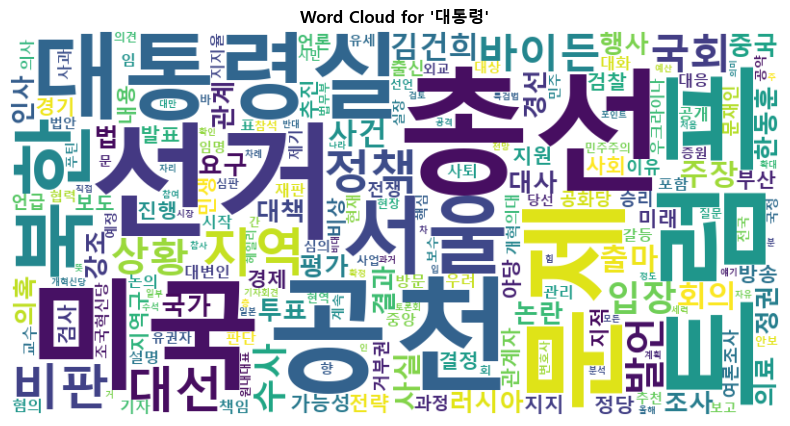

In [174]:
# 워드 클라우드 생성 및 시각화
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(co_frequency1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for '대통령'")
plt.show()

In [175]:
from collections import Counter

# 특정 단어 설정
target_word = "이재명"

# 제외할 단어 리스트 설정
exclude_words = [ "윤","의원","후보","위원장",
                 "정부","대표","국민","라며","내","통해","친","관","곳","경우","개",
                "재","석","후","최근","건","박","데","조","뒤","위해",
                "가장","앞서","달","이재","지금","분","전날","번"
                "갑","임","계","창","번","향","정",     
                 "민주당","은","장관","선","여당","국민의힘","더불어민주당","이재명","대한민국","대통령","윤석열","위원",
                "교수","앞","다시","못","사람","갑","생각","사람","여사","처","번","면서","전날","지난달","거"]

# 특정 단어와 함께 출현하는 명사 빈도 분석 및 제외 단어 필터링
co_word_list = []
for sentence in article100['기사내용_noun']:
    if target_word in sentence:
        co_word_list.extend([word for word in sentence if word != target_word and word not in exclude_words])

co_frequency2 = Counter(co_word_list)
print(f"'{target_word}'와 함께 출현한 단어 빈도 상위 100개:", co_frequency2.most_common(100))

'이재명'와 함께 출현한 단어 빈도 상위 100개: [('공천', 7652), ('총선', 6616), ('선거', 4755), ('서울', 3643), ('지역', 3367), ('지역구', 2982), ('정당', 2822), ('경선', 2802), ('출마', 2593), ('비판', 2568), ('문제', 2438), ('경기', 2359), ('국회', 2289), ('논란', 2134), ('미래', 2104), ('재판', 2050), ('사건', 2024), ('전략', 1977), ('발언', 1957), ('대책', 1955), ('위원회', 1923), ('현역', 1902), ('평가', 1877), ('투표', 1873), ('정권', 1847), ('탈당', 1816), ('상황', 1789), ('인사', 1788), ('한동훈', 1785), ('결과', 1758), ('주장', 1756), ('사실', 1725), ('최고', 1662), ('연합', 1573), ('검찰', 1561), ('입장', 1549), ('여론조사', 1538), ('민주', 1498), ('조국혁신당', 1497), ('결정', 1493), ('비례', 1473), ('부산', 1452), ('조사', 1441), ('개혁신당', 1434), ('비명', 1424), ('대선', 1415), ('정책', 1375), ('회의', 1349), ('의혹', 1340), ('강조', 1325), ('인천', 1317), ('유세', 1299), ('문재인', 1279), ('심판', 1272), ('통합', 1272), ('비상', 1269), ('승리', 1255), ('수사', 1233), ('발표', 1218), ('야당', 1201), ('공약', 1198), ('이낙연', 1173), ('비례대표', 1170), ('요구', 1156), ('가능성', 1147), ('변호사', 1144), ('실장', 1137), ('사회', 1136), ('

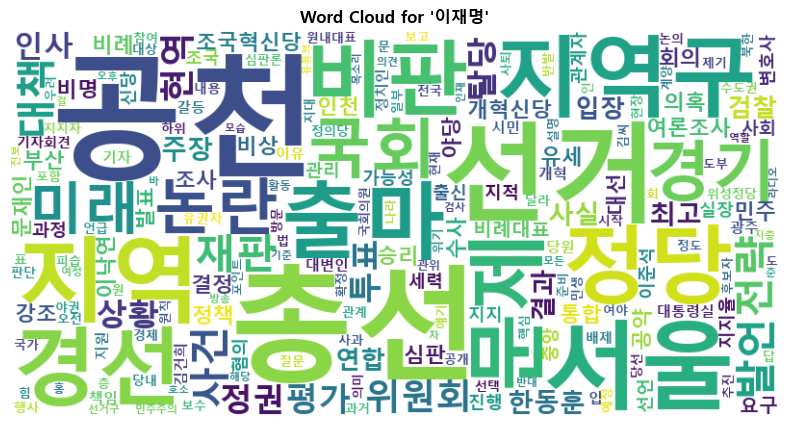

In [176]:
# 워드 클라우드 생성 및 시각화
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(co_frequency2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for '이재명'")
plt.show()

In [180]:
from collections import Counter

# 특정 단어 설정
target_word = "여당"


# 특정 단어와 함께 출현하는 명사 빈도 분석 및 제외 단어 필터링
co_word_list = []
for sentence in article100['기사내용_noun']:
    if target_word in sentence:
            # 문장 내 "국민의힘"을 "여당"으로 변경
            # 문장 내 "국힘"을 "여당"으로 변경
        sentence = ["국민의힘" if word == "여당" else word for word in sentence]
        sentence = ["국힘" if word == "여당" else word for word in sentence]
        co_word_list.extend([word for word in sentence if word != target_word and word not in exclude_words])

co_frequency3 = Counter(co_word_list)
print(f"'{target_word}'와 함께 출현한 단어 빈도 상위 100개:", co_frequency3.most_common(100))

'여당'와 함께 출현한 단어 빈도 상위 100개: [('총선', 4420), ('선거', 3207), ('공천', 2586), ('지역', 2153), ('국회', 2062), ('서울', 1972), ('대통령실', 1960), ('문제', 1926), ('정당', 1670), ('비판', 1638), ('야당', 1559), ('법', 1512), ('김건희', 1509), ('대책', 1500), ('조사', 1488), ('한동훈', 1486), ('정책', 1345), ('요구', 1323), ('입장', 1287), ('수사', 1284), ('투표', 1279), ('지역구', 1278), ('논란', 1267), ('상황', 1248), ('위원회', 1212), ('출마', 1201), ('주장', 1186), ('결과', 1166), ('행사', 1137), ('평가', 1130), ('의혹', 1124), ('경기', 1070), ('사건', 1052), ('부산', 996), ('여론조사', 993), ('발언', 982), ('비상', 973), ('대사', 969), ('거부권', 968), ('공약', 962), ('정권', 956), ('사실', 953), ('인사', 897), ('관계자', 864), ('민생', 860), ('결정', 860), ('가능성', 856), ('회의', 825), ('의료', 820), ('강조', 815), ('여야', 809), ('법안', 803), ('지지율', 802), ('조국혁신당', 801), ('미래', 795), ('지적', 789), ('발표', 787), ('특별법', 780), ('대선', 779), ('참사', 773), ('지원', 772), ('사회', 764), ('출신', 763), ('사과', 748), ('검찰', 742), ('내용', 722), ('수도권', 720), ('원내대표', 719), ('응답', 719), ('진행', 709), ('이유', 705

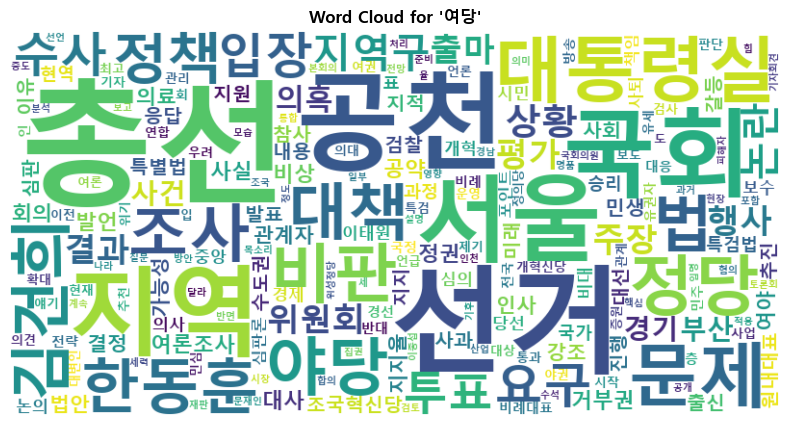

In [181]:
# 워드 클라우드 생성 및 시각화
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(co_frequency3)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for '여당'")
plt.show()

In [182]:
from collections import Counter

# 특정 단어 설정
target_word = "더불어민주당"


# 특정 단어와 함께 출현하는 명사 빈도 분석 및 제외 단어 필터링
co_word_list = []

for sentence in article100['기사내용_noun']:
    # 문장 내 "민주당"을 "더불어민주당"으로 변경
    sentence = ["더불어민주당" if word == "민주당" else word for word in sentence]
    
    if target_word in sentence:
        co_word_list.extend([word for word in sentence if word != target_word and word not in exclude_words])

co_frequency4 = Counter(co_word_list)
print(f"'{target_word}'와 함께 출현한 단어 빈도 상위 100개:", co_frequency4.most_common(100))


'더불어민주당'와 함께 출현한 단어 빈도 상위 100개: [('총선', 11098), ('공천', 10722), ('선거', 8320), ('서울', 6113), ('지역', 6048), ('정당', 5087), ('국회', 4927), ('경선', 4867), ('지역구', 4839), ('출마', 4637), ('문제', 4421), ('비판', 4346), ('위원회', 3880), ('투표', 3803), ('미래', 3670), ('경기', 3663), ('사건', 3581), ('논란', 3485), ('조사', 3353), ('결과', 3328), ('주장', 3264), ('대책', 3192), ('사실', 3174), ('발언', 3148), ('연합', 3105), ('재판', 3099), ('검찰', 3084), ('트럼프', 3079), ('정책', 3062), ('입장', 3027), ('현역', 2985), ('수사', 2946), ('상황', 2944), ('평가', 2912), ('전략', 2874), ('대선', 2874), ('인사', 2862), ('한동훈', 2821), ('의혹', 2789), ('법', 2788), ('결정', 2757), ('여론조사', 2710), ('정권', 2680), ('요구', 2608), ('부산', 2607), ('민주', 2589), ('공약', 2536), ('대통령실', 2516), ('탈당', 2473), ('개혁신당', 2423), ('혐의', 2382), ('조국혁신당', 2379), ('발표', 2364), ('비례', 2317), ('회의', 2316), ('지지', 2314), ('김건희', 2301), ('비례대표', 2299), ('사회', 2287), ('진행', 2201), ('최고', 2189), ('미국', 2187), ('가능성', 2173), ('승리', 2171), ('바이든', 2151), ('관계자', 2141), ('야당', 2110), ('강조', 20

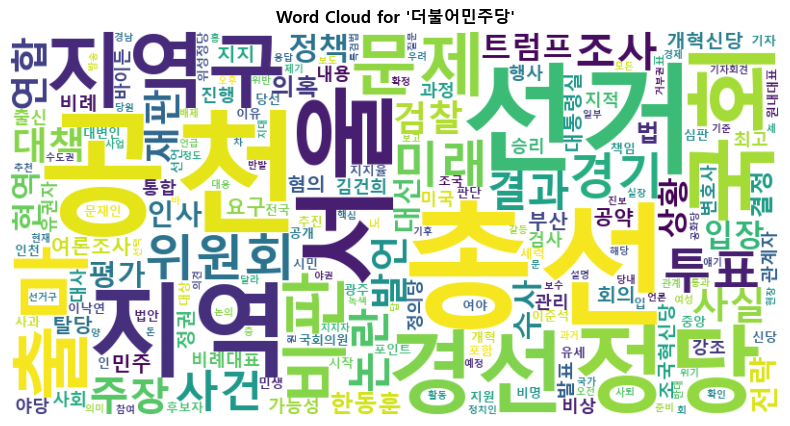

In [183]:
# 워드 클라우드 생성 및 시각화
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(co_frequency4)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for '더불어민주당'")
plt.show()

In [127]:
# URL에서 폰트 파일 다운로드
url = "https://github.com/taveevut/Windows-10-Fonts-Default/raw/master/malgunbd.ttf"
file_path = "malgunbd.ttf"
urllib.request.urlretrieve(url, file_path)

# 폰트 파일 경로 설정
font_path = os.path.abspath(file_path)


In [135]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

# matplotlib에서 한글 폰트 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)